In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,ShellLengthmm,ShellDiametermm,ShellHeightmm,WholeWeightgrams,ShuckedWeightgrams,VisceraWeightgrams,ShellWeightgrams,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,ShellLengthmm,ShellDiametermm,ShellHeightmm,WholeWeightgrams,ShuckedWeightgrams,VisceraWeightgrams,ShellWeightgrams,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   ShellLengthmm       4177 non-null   float64
 2   ShellDiametermm     4177 non-null   float64
 3   ShellHeightmm       4177 non-null   float64
 4   WholeWeightgrams    4177 non-null   float64
 5   ShuckedWeightgrams  4177 non-null   float64
 6   VisceraWeightgrams  4177 non-null   float64
 7   ShellWeightgrams    4177 non-null   float64
 8   Rings               4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.isnull().sum()

Sex                   0
ShellLengthmm         0
ShellDiametermm       0
ShellHeightmm         0
WholeWeightgrams      0
ShuckedWeightgrams    0
VisceraWeightgrams    0
ShellWeightgrams      0
Rings                 0
dtype: int64

Exploratory Data Analysis

Text(0.5, 1.0, 'Sex')

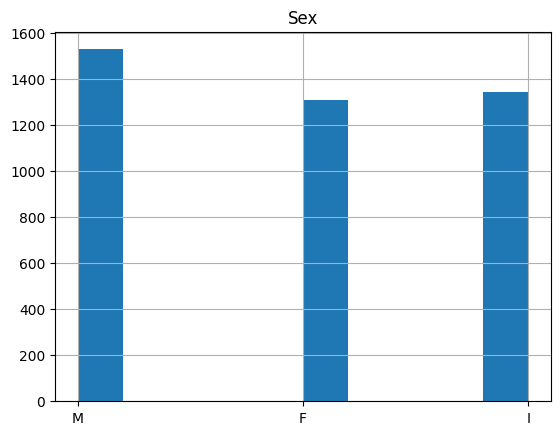

In [9]:
df['Sex'].hist()
plt.title('Sex')

Text(0.5, 1.0, 'Shell Length in mm')

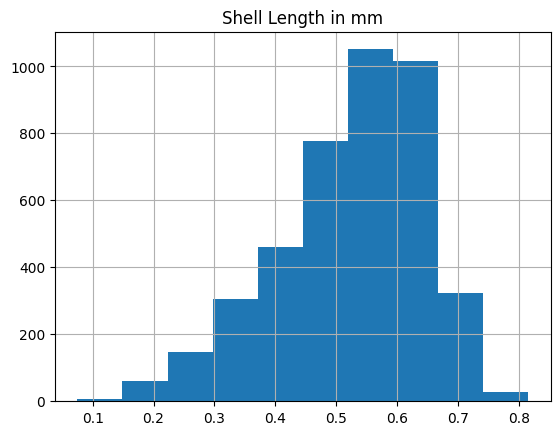

In [8]:
df['ShellLengthmm'].hist()
plt.title('Shell Length in mm')

Text(0.5, 1.0, 'Shell Diameter MM')

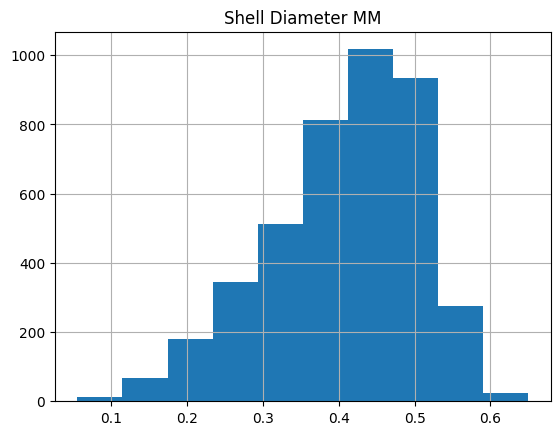

In [10]:
df['ShellDiametermm'].hist()
plt.title('Shell Diameter MM')

Text(0.5, 1.0, 'Shell Height MM')

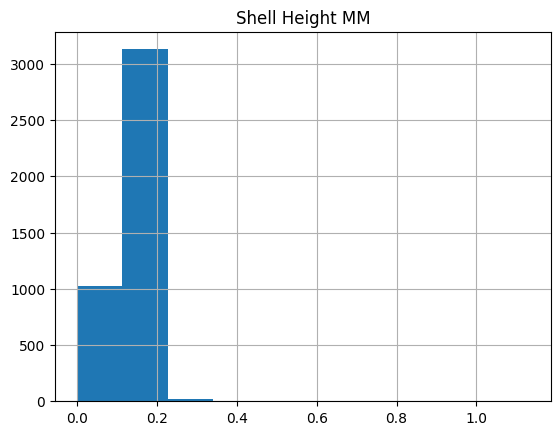

In [11]:
df['ShellHeightmm'].hist()
plt.title('Shell Height MM')

Text(0.5, 1.0, 'Whole Weight grams')

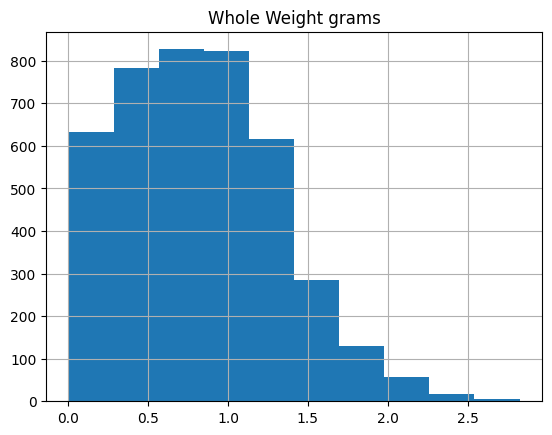

In [12]:
df['WholeWeightgrams'].hist()
plt.title('Whole Weight grams')

Text(0.5, 1.0, 'Shucked Weight grams')

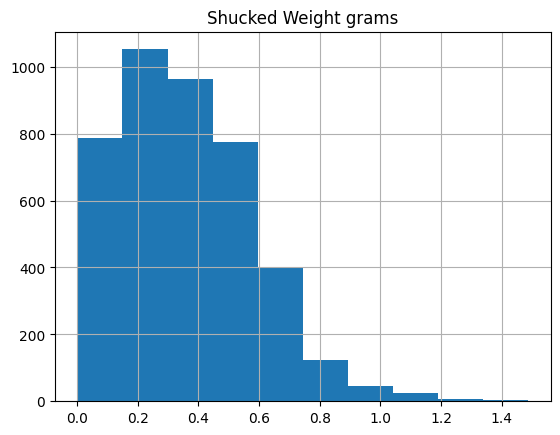

In [13]:
df['ShuckedWeightgrams'].hist()
plt.title('Shucked Weight grams')

Text(0.5, 1.0, 'Viscera Weight grams')

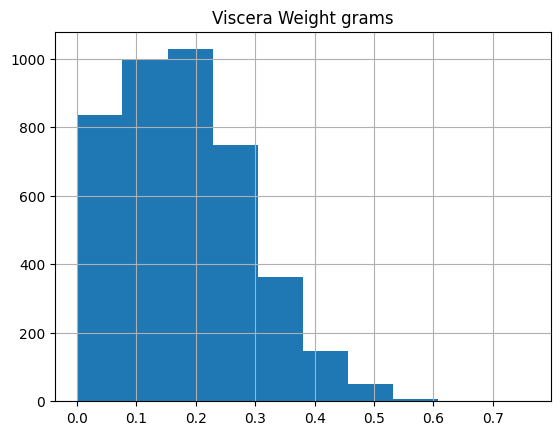

In [14]:
df['VisceraWeightgrams'].hist()
plt.title('Viscera Weight grams')

Text(0.5, 1.0, 'Shell Weight grams')

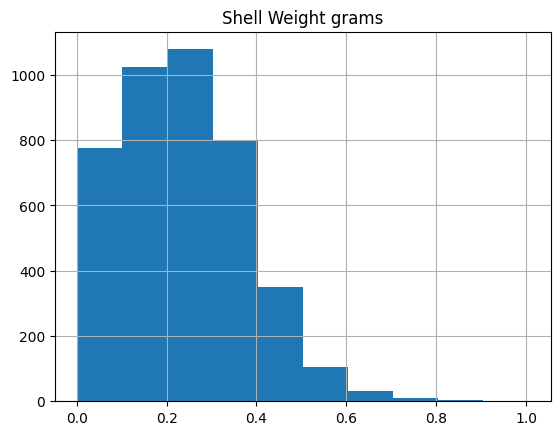

In [15]:
df['ShellWeightgrams'].hist()
plt.title('Shell Weight grams')

Text(0.5, 1.0, 'Number of Rings')

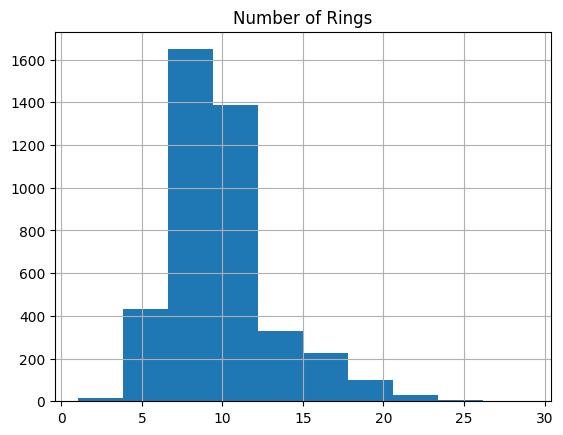

In [16]:
df['Rings'].hist()
plt.title('Number of Rings')